# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import time
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

# User Inputs

* **ID** = TIC ID of selected target  
* **sectors** = Observational sector of TESS  


* **period** = Orbital Period  
* **tdepth** = Transit Depth  


* **lc** = Light curve file  
* **contrastcurve_file** = Contrast curve file  


* **band** = Band of filter through which CC file was created. (TESS, Vis, J, H, K)  
From table below we can identify which band to choose.  

|   Wavelength   | Central Wavelength | Filter |
|:--------------:|:------------------:|:------:|
|  600 - 1000 nm | 786.5 nm           |  TESS  |
|   400 - 800 nm | 550 nm             |   Vis  |
| 1000 - 1500 nm | 1250 nm            |   J    |
| 1400 - 2000 nm | 1650 nm            |   H    |
| 1800 - 2600 nm | 2200 nm            |   K    |

* We usually encounter with following wavelengths,  
 - **562 nm** : Vis filter  
 - **832 nm** : TESS filter  
 - **Br-Gamma** (2172 - 2202 nm) : K filter
 - **Jcont** (1190 - 1230 nm) : J filter

# I/P

* *Use these values for input*  

  - **Sector 22:**  
Period = 10.6439799245    
tdepth = 0.0375855376**2
   
  - **Sector 49:**  
Period = 10.6439686334   
tdepth = 0.0328390389**2

In [2]:
ID = 119584412
sectors = np.array([22])

period = 10.6439799245
tdepth = 0.0375855376**2

lc = pd.read_csv("TOI_1801_22.csv", header=None)
contrastcurve_file = "Keck2_10m_K.csv"

band = 'K'

# Downloading & Visualizing Data

In [3]:
target = tr.target(ID=ID, sectors=sectors)

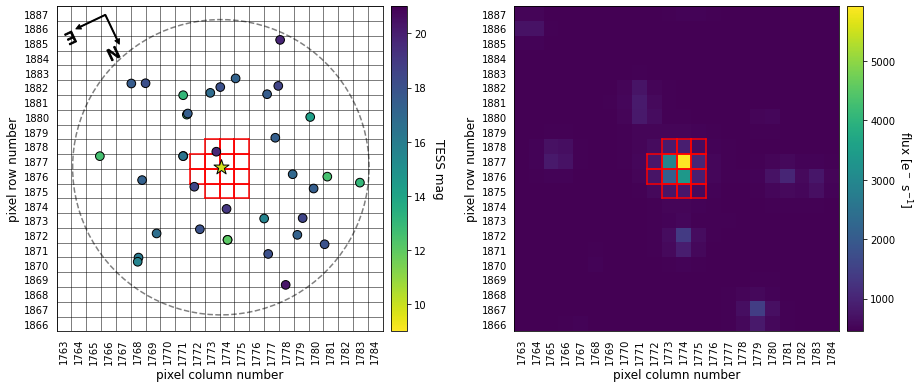

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,119584412,9.85623,8.649,8.002,7.805,175.576559,23.026855,0.541272,0.545591,3815.00,32.567800,0.000,0.000
1,903549817,19.67980,NaN,NaN,NaN,175.575438,23.020498,NaN,NaN,NaN,NaN,23.184,189.217
2,119584409,18.44410,16.749,15.999,16.431,175.590489,23.029324,NaN,NaN,NaN,NaN,47.002,79.097
3,119584418,18.26500,15.323,14.514,14.082,175.589053,23.016390,NaN,NaN,NaN,NaN,55.975,132.303
4,10000668084,16.40500,14.655,13.967,13.354,175.589157,23.016413,NaN,NaN,NaN,NaN,56.174,132.003
5,903549823,19.11180,NaN,NaN,NaN,175.582096,23.042799,NaN,NaN,NaN,NaN,60.260,17.723
6,119584414,17.40020,16.711,16.219,15.615,175.549939,23.025552,0.860000,0.547198,5131.00,0.127313,88.321,266.960
7,119584427,13.14680,12.220,11.819,11.721,175.579997,23.002131,NaN,NaN,NaN,2.523450,89.735,172.704
8,903549813,17.44100,NaN,NaN,NaN,175.579405,23.001907,NaN,NaN,NaN,NaN,90.308,174.005
9,119584398,17.95500,16.734,15.400,15.408,175.596244,23.045557,NaN,NaN,NaN,NaN,93.734,44.084


In [4]:
ap = np.array([[1773, 1875], [1774, 1875], [1775, 1875], [1772, 1876], 
               [1773, 1876], [1774, 1876], [1775, 1876], [1772, 1877], 
               [1773, 1877], [1774, 1877], [1775, 1877], [1773, 1878], 
               [1774, 1878], [1775, 1878]])

target.plot_field(sector = sectors[0], ap_pixels = ap)
 
target.stars

# Check Nearby Region

In [5]:
apertures = np.array([ap])
target.calc_depths(tdepth = tdepth, all_ap_pixels = apertures)

target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,119584412,9.85623,8.649,8.002,7.805,175.576559,23.026855,0.541272,0.545591,3815.00,32.567800,0.000,0.000,9.991944e-01,0.001414
1,903549817,19.67980,NaN,NaN,NaN,175.575438,23.020498,NaN,NaN,NaN,NaN,23.184,189.217,9.621194e-05,0.000000
2,119584409,18.44410,16.749,15.999,16.431,175.590489,23.029324,NaN,NaN,NaN,NaN,47.002,79.097,1.255931e-04,0.000000
3,119584418,18.26500,15.323,14.514,14.082,175.589053,23.016390,NaN,NaN,NaN,NaN,55.975,132.303,7.254331e-05,0.000000
4,10000668084,16.40500,14.655,13.967,13.354,175.589157,23.016413,NaN,NaN,NaN,NaN,56.174,132.003,3.967030e-04,0.000000
5,903549823,19.11180,NaN,NaN,NaN,175.582096,23.042799,NaN,NaN,NaN,NaN,60.260,17.723,3.344977e-05,0.000000
6,119584414,17.40020,16.711,16.219,15.615,175.549939,23.025552,0.860000,0.547198,5131.00,0.127313,88.321,266.960,4.268310e-06,0.000000
7,119584427,13.14680,12.220,11.819,11.721,175.579997,23.002131,NaN,NaN,NaN,2.523450,89.735,172.704,3.666283e-05,0.000000
8,903549813,17.44100,NaN,NaN,NaN,175.579405,23.001907,NaN,NaN,NaN,NaN,90.308,174.005,6.373459e-07,0.000000
9,119584398,17.95500,16.734,15.400,15.408,175.596244,23.045557,NaN,NaN,NaN,NaN,93.734,44.084,5.211377e-07,0.000000


In [6]:
for i in range (1, np.size(target.stars['ID'])):
    if target.stars['tdepth'][i] !=0:
        print(target.stars['ID'][i])

# Ploting CC File

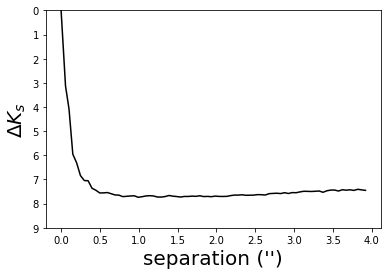

In [7]:
cc = pd.read_csv(contrastcurve_file, header=None)
sep, dmag = cc[0].values, cc[1].values

plt.plot(sep, dmag, 'k-');
plt.ylim(9,0);
plt.ylabel("$\\Delta K_s$", fontsize=20);
plt.xlabel("separation ('')", fontsize=20);

# Calculating FPP & NFPP

In [8]:
%%time
# read in the light curve
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

#lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err)#.bin(time_bin_size=lc_binsize)

target.calc_probs(time = lc.time.value, 
                  flux_0 = lc.flux.value, 
                  flux_err_0 = np.mean(lc.flux_err.value), 
                  P_orb = P_orb,
                  contrast_curve_file = contrastcurve_file,
                  filt = band,
                  exptime = 0.0013888888888889)

Calculating TP scenario probabilitiey for 119584412.
Calculating EB and EBx2P scenario probabilities for 119584412.
Calculating PTP scenario probability for 119584412.
Calculating PEB and PEBx2P scenario probabilities for 119584412.
Calculating STP scenario probability for 119584412.
Calculating SEB and SEBx2P scenario probabilities for 119584412.
Calculating DTP scenario probability for 119584412.
Calculating DEB and DEBx2P scenario probabilities for 119584412.
Calculating BTP scenario probability for 119584412.
Calculating BEB and BEBx2P scenario probabilities for 119584412.
Wall time: 6min 41s


In [9]:
df_results = target.probs
print("FPP = ", target.FPP)
print("NFPP = ", target.NFPP)
df_results

FPP =  9.541200534757266e-06
NFPP =  0.0


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,119584412,TP,0.541272,0.545591,10.64398,89.746174,0.107372,0.203306,92.572364,2.008668,0.000000,0.000000,8.775419e-01
1,119584412,EB,0.541272,0.545591,10.64398,86.936282,1.862474,0.098911,52.794224,0.000000,0.511175,0.516053,7.818374e-39
2,119584412,EBx2P,0.541272,0.545591,21.28796,89.009822,0.268879,0.857016,177.687895,0.000000,0.530148,0.537901,3.889332e-11
3,119584412,PTP,0.541272,0.545591,10.64398,89.981082,0.014368,0.451546,259.189117,2.099000,0.000000,0.000000,0.000000e+00
4,119584412,PEB,0.541272,0.545591,10.64398,86.697342,1.846371,0.190332,45.407544,0.000000,0.494387,0.496411,1.664449e-40
5,119584412,PEBx2P,0.541272,0.545591,21.28796,88.909080,0.621062,0.705286,185.196669,0.000000,0.537405,0.545591,1.633694e-16
6,119584412,STP,0.437041,0.435831,10.64398,89.598447,0.217596,0.195497,149.798525,2.764726,0.000000,0.000000,0.000000e+00
7,119584412,SEB,0.165004,0.196983,10.64398,89.302810,0.088137,0.931179,173.726994,0.000000,0.030968,0.100000,1.160587e-15
8,119584412,SEBx2P,0.483282,0.483680,21.28796,88.984334,0.489504,0.719681,168.204479,0.000000,0.467467,0.466380,4.130667e-13
9,119584412,DTP,0.541272,0.545591,10.64398,89.736892,0.140362,0.011265,333.593777,2.005575,0.000000,0.000000,1.224485e-01


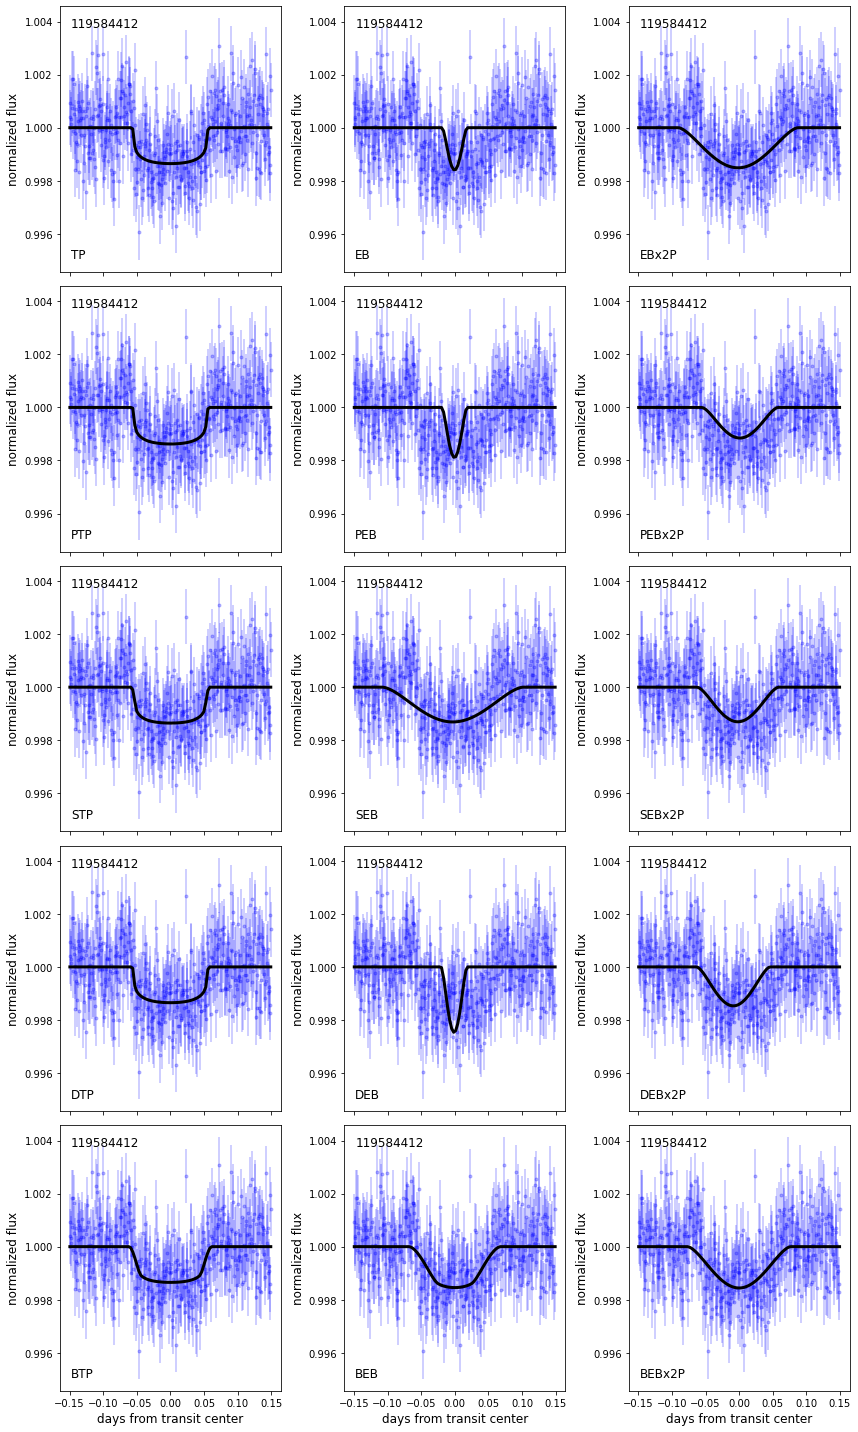

In [10]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=np.mean(flux_err))